In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Y dataset')

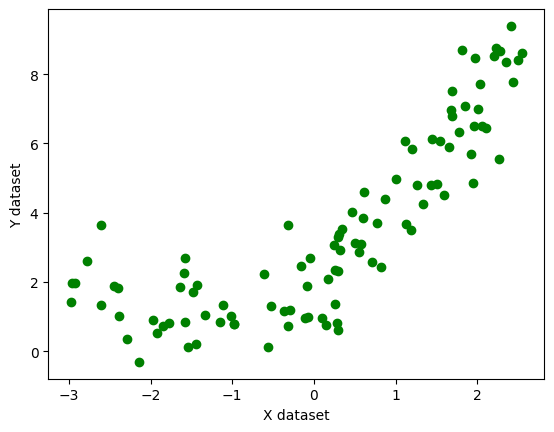

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [5]:
model.fit(X_train ,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
score=r2_score(y_test,model.predict(X_test))
print(score)

0.5831247641360682


Text(0, 0.5, 'Y')

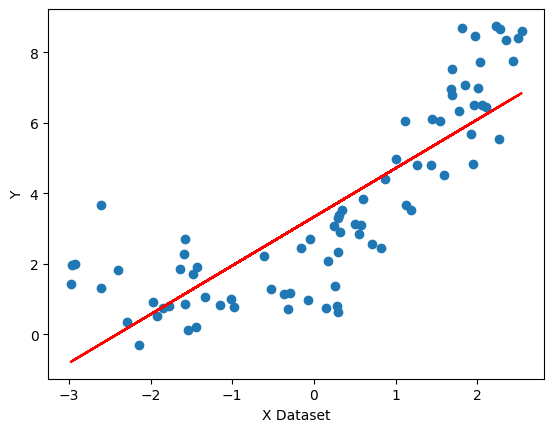

In [7]:
## Lets visualize this model
plt.plot(X_train,model.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [8]:
#LEts apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# Degree 2 
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [10]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8652965247236007


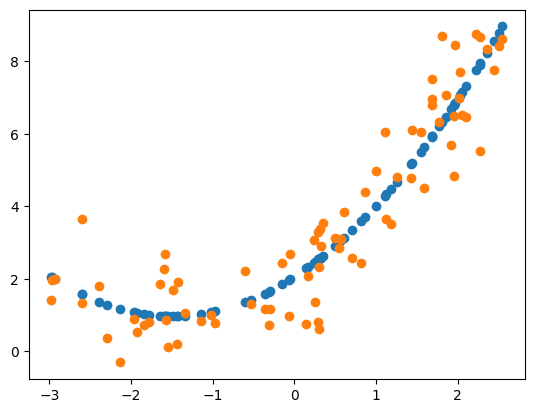

In [11]:

plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [12]:
# Degree 3
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [13]:
from sklearn.metrics import r2_score
regression_2 = LinearRegression()
regression_2.fit(X_train_poly, y_train)
y_pred = regression_2.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8664631183485851


In [15]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)


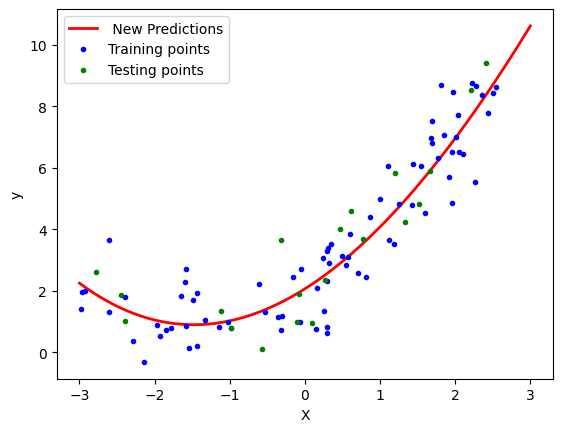

In [16]:
y_new = regression_2.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()